In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats 
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from scipy.stats import weibull_min, norm

In [2]:
from scipy.io import loadmat
import pandas as pd 
file_path = 'timeData.mat/timeData.mat'
data = loadmat(file_path)

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'columnNames', 'trialMat'])


In [3]:
data['columnNames']

array([[(array([[1]], dtype=uint8), array([[2]], dtype=uint8), array([[3]], dtype=uint8), array([[4]], dtype=uint8), array([[5]], dtype=uint8), array([[6]], dtype=uint8), array([[7]], dtype=uint8), array([[8]], dtype=uint8), array([[9]], dtype=uint8), array([[10]], dtype=uint8), array([[11]], dtype=uint8), array([[12]], dtype=uint8), array([[13]], dtype=uint8), array([[14]], dtype=uint8), array([[15]], dtype=uint8), array([[16]], dtype=uint8), array([[17]], dtype=uint8), array([[18]], dtype=uint8), array([[19]], dtype=uint8), array([[20]], dtype=uint8), array([[21]], dtype=uint8), array([[22]], dtype=uint8), array([[23]], dtype=uint8), array([[24]], dtype=uint8), array([[25]], dtype=uint8), array([[26]], dtype=uint8), array([[27]], dtype=uint8), array([[28]], dtype=uint8), array([[29]], dtype=uint8), array([[30]], dtype=uint8), array([[31]], dtype=uint8), array([[32]], dtype=uint8), array([[33]], dtype=uint8), array([[34]], dtype=uint8), array([[35]], dtype=uint8), array([[36]], dtype=

In [4]:
data['trialMat'].shape

(200, 42)

In [5]:
pd.DataFrame(data['trialMat']).dropna(axis=1, how='all')

,0,2,4,8,9,12,13,14,22,24,25,28,30,31,32
0,2097.0,1001.0,19.0,9.51296,5.48394,1413.333333,0.0,0.0,62.709800,63.377350,63.671000,NaN,NaN,NaN,NaN
1,2097.0,1002.0,19.0,9.51296,-5.48394,733.333333,0.0,0.0,67.742525,68.424200,68.717200,69.491325,69.865175,69.985225,70.078700
2,2097.0,1003.0,19.0,11.00520,0.00000,1560.000000,0.0,0.0,71.240075,71.867675,72.161350,NaN,NaN,NaN,NaN
3,2097.0,1004.0,19.0,11.00520,0.00000,NaN,0.0,0.0,76.900300,77.661275,NaN,NaN,NaN,NaN,NaN
4,2097.0,1005.0,19.0,9.51296,5.48394,1306.666667,0.0,0.0,79.062975,79.783875,80.077525,81.425825,81.826275,81.946425,82.039900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2097.0,2164.0,19.0,-9.51296,-5.52125,933.333333,0.0,0.0,861.130100,861.677475,861.971125,862.945625,863.319450,863.439600,863.532975
196,2097.0,2165.0,19.0,9.51296,5.48394,986.666667,0.0,0.0,864.694425,865.081575,865.375325,866.403175,866.750275,866.870450,866.963850
197,2097.0,2166.0,19.0,5.52125,9.51296,920.000000,0.0,0.0,868.125200,868.605900,868.899500,869.860675,870.261200,870.381300,870.474750
198,2097.0,2167.0,19.0,9.51296,5.48394,1200.000000,0.0,0.0,871.636125,872.303700,872.597375,873.838875,874.239325,874.359450,874.452850


In [6]:
columnnames = data['columnNames']
columnnames

array([[(array([[1]], dtype=uint8), array([[2]], dtype=uint8), array([[3]], dtype=uint8), array([[4]], dtype=uint8), array([[5]], dtype=uint8), array([[6]], dtype=uint8), array([[7]], dtype=uint8), array([[8]], dtype=uint8), array([[9]], dtype=uint8), array([[10]], dtype=uint8), array([[11]], dtype=uint8), array([[12]], dtype=uint8), array([[13]], dtype=uint8), array([[14]], dtype=uint8), array([[15]], dtype=uint8), array([[16]], dtype=uint8), array([[17]], dtype=uint8), array([[18]], dtype=uint8), array([[19]], dtype=uint8), array([[20]], dtype=uint8), array([[21]], dtype=uint8), array([[22]], dtype=uint8), array([[23]], dtype=uint8), array([[24]], dtype=uint8), array([[25]], dtype=uint8), array([[26]], dtype=uint8), array([[27]], dtype=uint8), array([[28]], dtype=uint8), array([[29]], dtype=uint8), array([[30]], dtype=uint8), array([[31]], dtype=uint8), array([[32]], dtype=uint8), array([[33]], dtype=uint8), array([[34]], dtype=uint8), array([[35]], dtype=uint8), array([[36]], dtype=

In [7]:
len_columnnames = len(data['columnNames'].dtype.names)
len_trialmat = data['trialMat'].shape

len_columnnames, len_trialmat

(51, (200, 42))

In [8]:
columnnames[0][0]

(array([[1]], dtype=uint8), array([[2]], dtype=uint8), array([[3]], dtype=uint8), array([[4]], dtype=uint8), array([[5]], dtype=uint8), array([[6]], dtype=uint8), array([[7]], dtype=uint8), array([[8]], dtype=uint8), array([[9]], dtype=uint8), array([[10]], dtype=uint8), array([[11]], dtype=uint8), array([[12]], dtype=uint8), array([[13]], dtype=uint8), array([[14]], dtype=uint8), array([[15]], dtype=uint8), array([[16]], dtype=uint8), array([[17]], dtype=uint8), array([[18]], dtype=uint8), array([[19]], dtype=uint8), array([[20]], dtype=uint8), array([[21]], dtype=uint8), array([[22]], dtype=uint8), array([[23]], dtype=uint8), array([[24]], dtype=uint8), array([[25]], dtype=uint8), array([[26]], dtype=uint8), array([[27]], dtype=uint8), array([[28]], dtype=uint8), array([[29]], dtype=uint8), array([[30]], dtype=uint8), array([[31]], dtype=uint8), array([[32]], dtype=uint8), array([[33]], dtype=uint8), array([[34]], dtype=uint8), array([[35]], dtype=uint8), array([[36]], dtype=uint8), 

In [9]:
[name for name in data['columnNames'].dtype.names]

['monkeyID',
 'unitID',
 'fileID',
 'trialNumber',
 'trial_type',
 'dot_diam',
 'coherence',
 'dot_dir',
 'target1_x',
 'target1_y',
 'target2_x',
 'target2_y',
 'dot_duration',
 'fixation_x',
 'fixation_y',
 'dots_x',
 'dots_y',
 'dot_speed',
 'date',
 'seedvar',
 'seed',
 'pre0_post1',
 'time_FP_on',
 'time_fix_acq',
 'time_target_on',
 'time_target_off',
 'time_dots_on',
 'time_dots_off',
 'time_FP_off',
 'time_saccade',
 'time_targ_acq',
 'time_reward',
 'time_end',
 'target_choice',
 'correct_target',
 'isCorrect',
 'react_time',
 'drug_type_session',
 'drug_dose_session',
 'drug_type_experiment',
 'RF_x',
 'RF_y',
 'time_target1_on',
 'time_target2_on',
 'offset_frame_target1and2',
 'target_asynchrony',
 'time_since_previous_trial',
 'reward_size',
 'reward_prize',
 'signedCoherence',
 'rightwardChoice']

In [10]:
required_ = [name for name in data['columnNames'].dtype.names if name in [
    "time_target_on", "time_FP_off", "time_targ_acq"]]

In [11]:
len(columnnames[:data['trialMat'].shape[1]].dtype.names)

51

In [12]:
data['trialMat'].shape

(200, 42)

In [13]:
column_names = [name for name in data['columnNames'].dtype.names]
trial_data = data['trialMat']
df = pd.DataFrame(trial_data, columns=column_names[:trial_data.shape[1]])

In [14]:
df['go_time'] = df['time_FP_off'] - df['time_target_on']
df['reaction_time'] = df['time_targ_acq'] - df['time_FP_off']

df = df[(df['reaction_time'] > 0.1) & (df['reaction_time'] < 0.5)].copy()

In [15]:
df_sorted = df.sort_values('go_time').reset_index(drop=True)

In [17]:
df_sorted.to_csv("Sample_200.csv",index=False)

In [17]:
df_sorted[required_ + ['go_time','reaction_time']]

,time_target_on,time_FP_off,time_targ_acq,go_time,reaction_time
0,851.331650,852.199325,852.600650,0.867675,0.401325
1,790.097425,790.978525,791.352350,0.881100,0.373825
2,385.847850,386.835775,387.196200,0.987925,0.360425
3,296.352850,297.367400,297.741150,1.014550,0.373750
4,144.769175,145.797125,146.171675,1.027950,0.374550
...,...,...,...,...,...
156,282.429275,284.124700,284.485175,1.695425,0.360475
157,328.591825,330.327275,330.581750,1.735450,0.254475
158,612.322175,614.070950,614.418000,1.748775,0.347050
159,94.495050,96.310525,96.564125,1.815475,0.253600


Text(0, 0.5, 'Density')

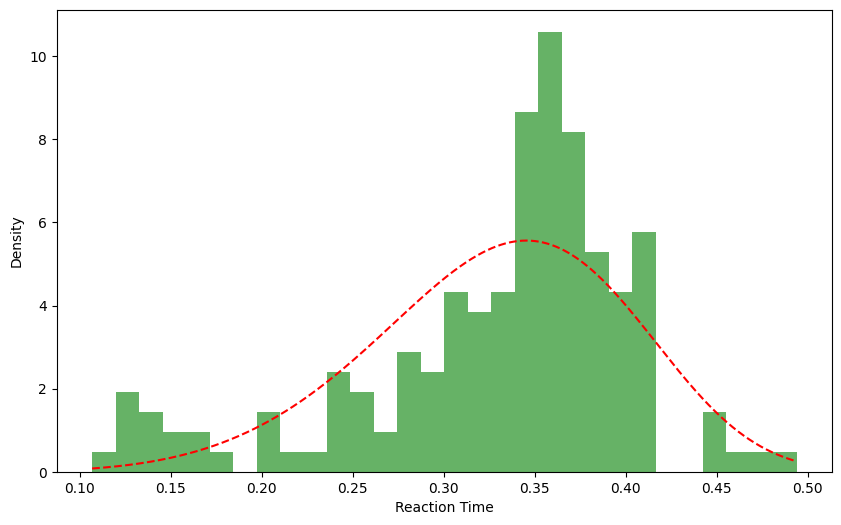

In [18]:
shape, loc, scale = weibull_min.fit(df_sorted['reaction_time'], floc=0)
x = np.linspace(df_sorted['reaction_time'].min(), df_sorted['reaction_time'].max(), 1000)
pdf = weibull_min.pdf(x, shape, loc, scale)
plt.figure(figsize=(10, 6))
plt.hist(df_sorted['reaction_time'], bins=30, density=True, alpha=0.6, color='g',)
plt.plot(x, pdf, 'r--')
plt.xlabel('Reaction Time')
plt.ylabel('Density')

Fitted parameters: (1, 5.329960940089952, 0, 0.3591061915831272)


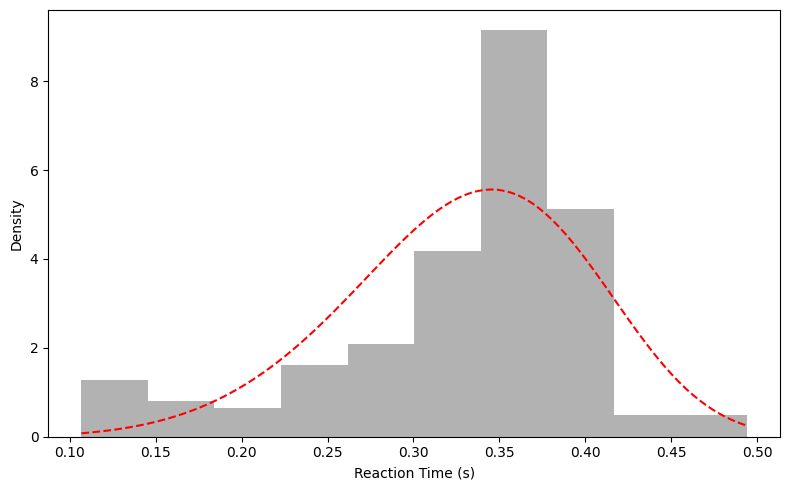

In [19]:
reaction_times = df["reaction_time"]
params = stats.exponweib.fit(reaction_times, floc=0, f0=1)
x = np.linspace(reaction_times.min(), reaction_times.max(), 100)
pdf_fitted = stats.exponweib.pdf(x, *params)

plt.figure(figsize=(8, 5))
plt.hist(reaction_times, bins=10, density=True,
         alpha=0.6, color='gray')
plt.plot(x, pdf_fitted, 'r--')
plt.xlabel("Reaction Time (s)")
plt.ylabel("Density")
plt.tight_layout()
print("Fitted parameters:", params)

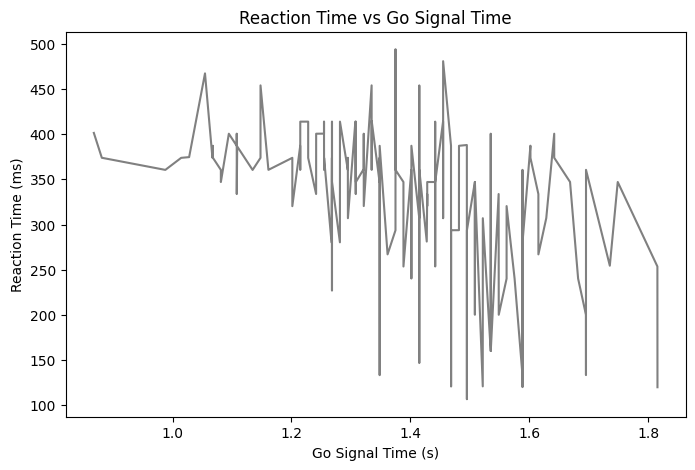

In [195]:
df["reaction_time_ms"] = df["reaction_time"] * 1000
df = df.sort_values(by="go_time")
plt.figure(figsize=(8, 5))
plt.plot(df["go_time"], df["reaction_time_ms"],
            color="gray")
plt.xlabel("Go Signal Time (s)")
plt.ylabel("Reaction Time (ms)")
plt.title("Reaction Time vs Go Signal Time")
plt.show()

In [197]:
def blurred_weibull_hazard(t_array, alpha, beta, delay, phi=0.26):
    t_eval = np.linspace(0.5, 2.0, 1000)
    t_adj = np.clip(t_eval - delay, 1e-3, None)
    f = weibull_min.pdf(t_adj, beta, scale=1 / alpha)
    blurred = np.zeros_like(t_eval)
    for i, t in enumerate(t_eval):
        s = t_eval
        sigma = phi * t
        kernel = norm.pdf(t - s, scale=sigma)
        kernel /= kernel.sum()
        blurred[i] = np.sum(f * kernel)

    F_blurred = np.cumsum(blurred) * (t_eval[1] - t_eval[0])
    hazard = blurred / (1 - F_blurred + 1e-8)
    hazard = hazard / np.max(hazard)

    return np.interp(t_array, t_eval, hazard)

In [198]:
def rt_model(t, baseline, weight, alpha, beta, delay):
    h = blurred_weibull_hazard(t, alpha, beta, delay)
    return baseline - weight * h

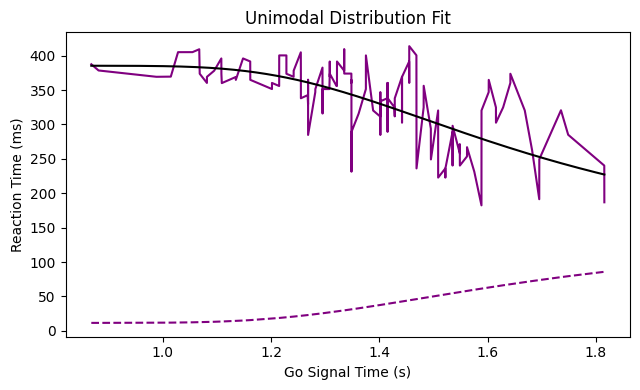

In [ ]:
x = df["go_time"].values
y = df["reaction_time_ms"].values

p0 = [300, 100, 1.0, 2.0, 0.5] 
popt, _ = curve_fit(rt_model, x, y, p0=p0, maxfev=20000)

x_fit = np.linspace(min(x), max(x), 300)
y_fit = rt_model(x_fit, *popt)
hazard_at_go_times = blurred_weibull_hazard(
    df["go_time"].values, *popt[2:])
hazard_at_go_times *= 100


plt.figure(figsize=(6.5, 4))

plt.plot(df["go_time"], pd.Series(df["reaction_time_ms"]).rolling(3, center=True, min_periods=1).mean(),
         color='purple')

plt.plot(df["go_time"], hazard_at_go_times, 'purple',
         linestyle='--')
plt.plot(x_fit, y_fit, color='black')

plt.xlabel("Go Signal Time (s)")
plt.ylabel("Reaction Time (ms)")
plt.title("Unimodal Distribution Fit")
plt.tight_layout()
plt.show()

In [212]:
for name, val in zip(["Baseline", "Weight", "Alpha", "Beta", "Delay"], popt):
    print(f"{name}: {val:.3f}")

Baseline: 409.901
Weight: 212.943
Alpha: 0.000
Beta: 1.654
Delay: 1.757
